In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [158]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression() 

#Your code:
model.fit(X,y)

#Hint: .fit()

LinearRegression()

Predicted price for 2000 sqft:  [506619.45464836]
Matching score:  0.49670880166311393


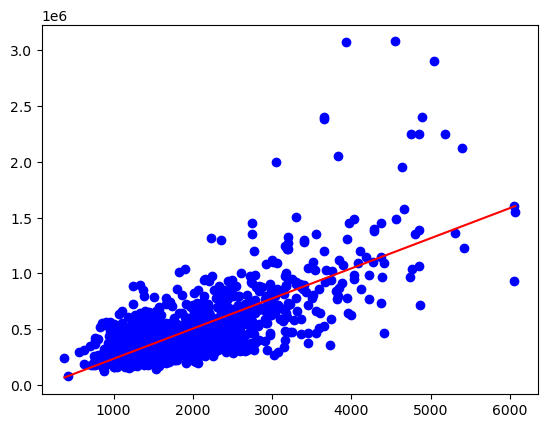

In [159]:
#b)

#Your code:
# Predict price for 2000 sqft
predictedPrice = model.predict(np.array([[2000]]))
print("Predicted price for 2000 sqft: ",predictedPrice)
matching_score = model.score(X,y)
print("Matching score: ", matching_score)

X_range = np.linspace(X.min(), X.max(), 1000)
y_line = model.coef_*X_range + model.intercept_ # y=ax+b
plt.scatter(X,y, color='blue')
plt.plot(X_range, y_line, color ='red')
plt.show()
#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

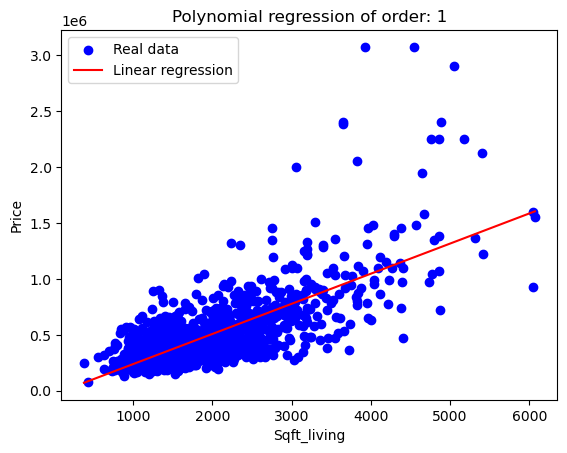

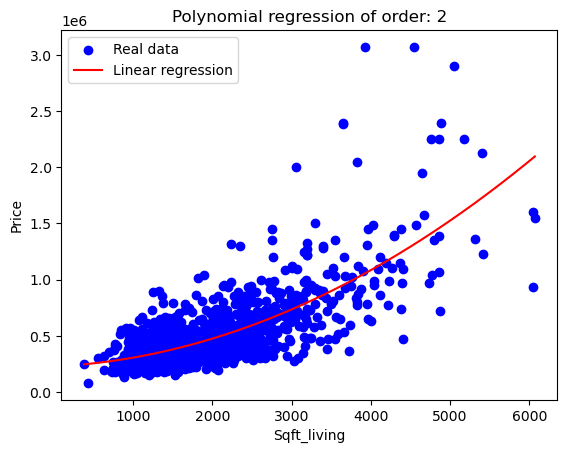

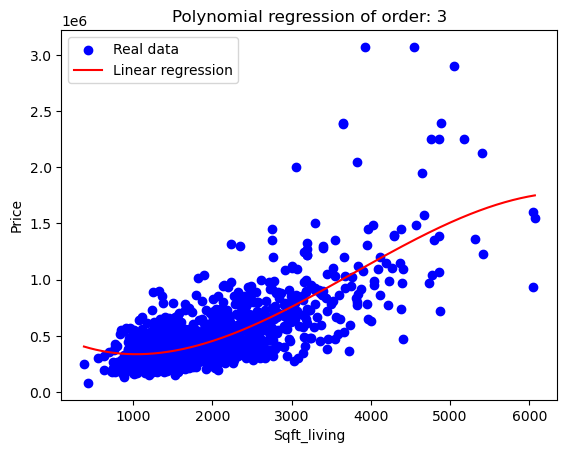

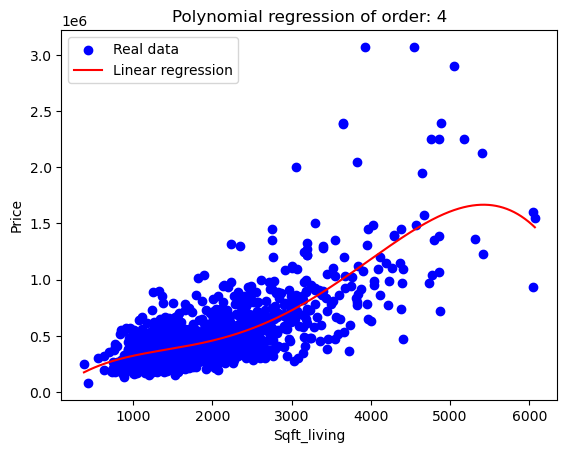

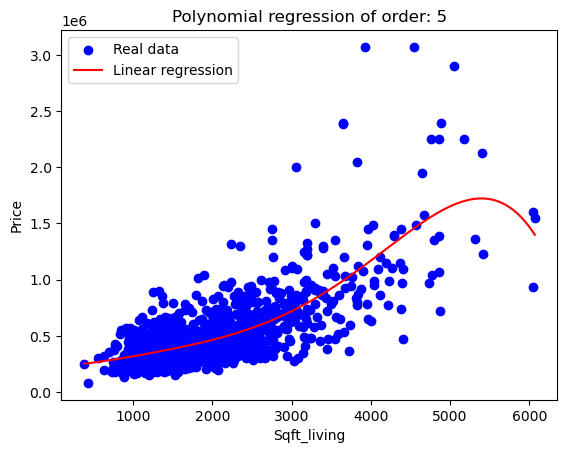

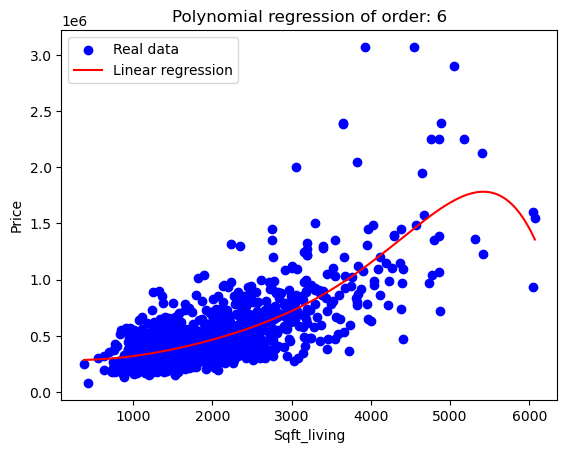

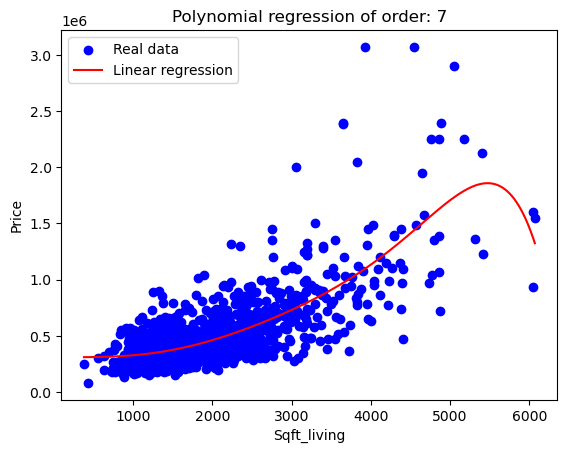

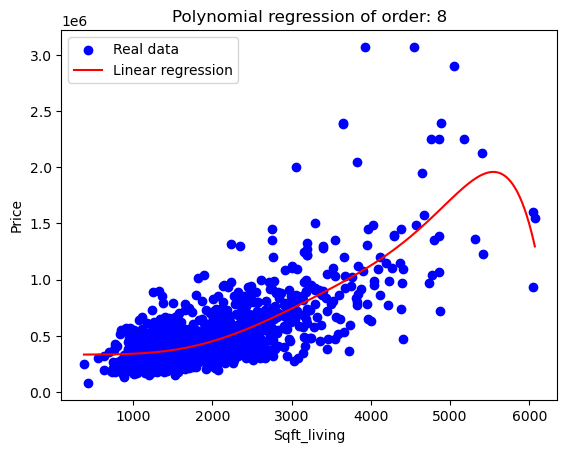

In [160]:
#c)
errors = []
for order in range(1, 9):
    poly = PolynomialFeatures(order, include_bias=False)
    X_order = poly.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_order, y)
    
    # Transforming X_range into polynomial
    X_range_order = poly.transform(X_range.reshape(-1,1))
    y_pred_range = model.predict(X_range_order)
    
    # y values for error calculation between real data and predicted data for each order
    y_pred = model.predict(X_order)
    
    plt.scatter(X, y, color='blue', label='Real data')
    plt.plot(X_range, y_pred_range, color='red', label="Linear regression")
    plt.xlabel('Sqft_living')
    plt.ylabel('Price')
    plt.title(f'Polynomial regression of order: {order}')
    plt.legend()
    plt.show()
    
    errors.append(mean_squared_error(y, y_pred))
    


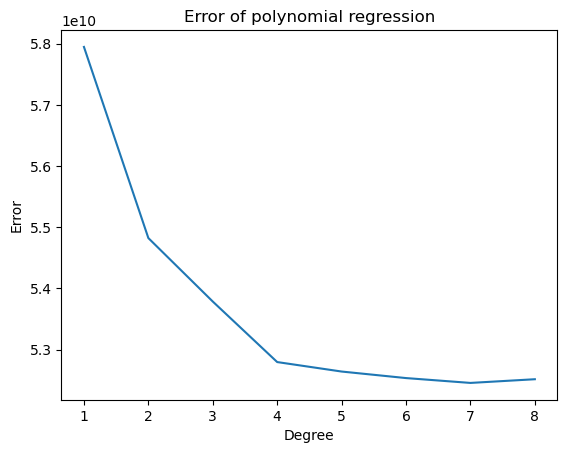

In [161]:
#Your code:
degree = range(1,9)

# descending error along with increasing degree until 8 degree
plt.title("Error of polynomial regression")
plt.xlabel("Degree")
plt.ylabel("Error")
plt.plot(degree, errors)
plt.show()

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

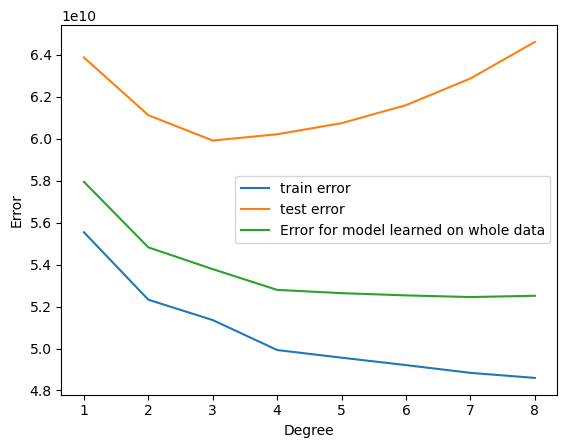

In [162]:
#a)
train_errors = []
test_errors = []
for order in range(1,9):

    poly = PolynomialFeatures(order, include_bias=False)
    X_order = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)

    model_training=LinearRegression()
    # fitting model to training data
    model_training.fit(X_train, y_train)
    
    # calculating errors for training and test data
    y_train_pred = model_training.predict(X_train)
    train_errors.append(mean_squared_error(y_train, y_train_pred))

    y_test_pred = model_training.predict(X_test)
    test_errors.append(mean_squared_error(y_test, y_test_pred))
    
    
plt.plot(degree, train_errors, label="train error")
plt.plot(degree, test_errors, label = "test error")
plt.plot(degree, errors, label="Error for model learned on whole data")
plt.xlabel("Degree")
plt.ylabel("Error")
plt.legend()
plt.show()
# as we see, the error for test data is increasing with increasing degree, which means that the model is overfitting

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

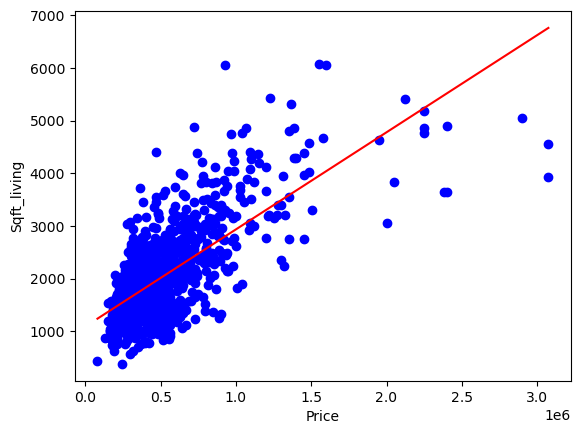

In [163]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:
model = LinearRegression()
model.fit(X,y)

X_range = np.linspace(X.min(), X.max(), 1000)
y_line = model.coef_*X_range + model.intercept_

plt.scatter(X,y, color='blue')
plt.plot(X_range, y_line, color ='red')
plt.xlabel('Price')
plt.ylabel('Sqft_living')
plt.show()


In [168]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))



#Your model:
# added condition and floors as they are also linearly correlated with price
X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view', 'condition', 'floors']].values.reshape(-1,6)
y = house_df.price.values.reshape(-1)

#reduced degree to 2 for better prediction
poly = PolynomialFeatures(2, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 48749590917.385284
Mean squared error equals: 47588267860.26425


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
